Introduction 

This dataset exists to help hidden patterns in customer purchases. Each row respresents one transaction, and each column shows whether a specific item was included int hat transaction or not. 

In [2]:
import pandas as pd 

df = pd.read_csv('market.csv')


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session 

Loading Libraries 

In [6]:
import numpy as np

import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [7]:
from mlxtend.frequent_patterns import apriori, association_rules

In [12]:
df_raw = pd.read_csv("market.csv",sep=";")
df_raw.head()

,Bread,Honey,Bacon,Toothpaste,Banana,Apple,Hazelnut,Cheese,Meat,Carrot,...,Milk,Butter,ShavingFoam,Salt,Flour,HeavyCream,Egg,Olive,Shampoo,Sugar
0,1,0,1,0,1,1,1,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,1,1,1,0,1,1,1,0,0,0,...,1,1,0,0,1,0,0,1,1,0
2,0,1,1,1,1,1,1,1,1,0,...,1,0,1,1,1,1,1,0,0,1
3,1,1,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,1,1,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df = df_raw.astype(bool)
df.head()

,Bread,Honey,Bacon,Toothpaste,Banana,Apple,Hazelnut,Cheese,Meat,Carrot,...,Milk,Butter,ShavingFoam,Salt,Flour,HeavyCream,Egg,Olive,Shampoo,Sugar
0,True,False,True,False,True,True,True,False,False,True,...,False,False,False,False,False,True,True,False,False,True
1,True,True,True,False,True,True,True,False,False,False,...,True,True,False,False,True,False,False,True,True,False
2,False,True,True,True,True,True,True,True,True,False,...,True,False,True,True,True,True,True,False,False,True
3,True,True,False,True,False,True,False,False,False,False,...,True,False,False,False,True,False,True,True,True,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Suppport measures how common a group of items is in the dataset. It's the proportion of transactions that contain a specific item or combination of items. 

An example of this: 

- 100 total transactions 
- 25 transactions include both eggs and milk

Support (eggs, milk) = 25 / 100 = (25%)

Why support matters? 

High Support: the item combination is common and meaningful 
Low support: the pattern is rare and usually less useful
Analysts often set a minimum support threshold to filter out 

With the support, it gives us the frequency an itemset appears across all transactions. 



Confidence! Meaning association in rule mining. How likely is item B to appear when item A appears. 

Example:

- 100 people buy bread
- 70 of those also buy butter

Confidence(Bread → Butter) = 70 / 100 = 0.70 (70%)

Formula (simplified):
Confidence(A → B) = Support(A and B) ÷ Support(A)

Why confidence matters?

Predictive power: Higher confidence means a stronger rule
Rule ranking: Helps identify which associations are more meaningful
Recommendations: Supports “people who bought this also bought that”



Lift: association rule mining and why it's important beyond confidence. 

Lift measures whether two items occur together more often than we would expect by random chance.
It tells you if a relationship is actually meaningful or just due to popularity.

The idea behind the formula: 

Lift = Support(A and B) ÷ (Support(A) × Support(B)) 

- The bottom part (Support(A) × Support(B)) is how often A and B should appear together if they were unrelated.
- The top part is how often they actually appear together.

How to interpret lift:

Lift > 1 → Items are positively associated
-  They occur together more often than expected (good for recommendations)
  
Lift ≈ 1 → No real relationship
-  Co-occurrence is likely due to chance
  
Lift < 1 → Negative association
-  Buying one makes the other less likely

Lift tells you whether an association is meaningful or just a coincidence. 

We have all three now!

Support = how often 
Confidence = how likely 
Lift = how interesting 

Run the Apriori Algorithm

In [19]:
# Minimum support of 0.2 = itemsets present in at least 20% of transactions

min_support = 0.02
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False).head()

,support,itemsets
4,0.448276,(Banana)
7,0.443966,(Cheese)
2,0.431034,(Bacon)
6,0.420259,(Hazelnut)
1,0.415948,(Honey)


Generate Association Rules

In [24]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Make the antecedents and consequents readable
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
782145,"Meat, Cheese, Egg","Hazelnut, Bacon, Honey, Apple, Carrot",0.021552,0.208333,8.055556
782064,"Hazelnut, Bacon, Honey, Apple, Carrot","Meat, Cheese, Egg",0.021552,0.833333,8.055556
782125,"Hazelnut, Honey, Bacon, Apple","Meat, Cheese, Carrot, Egg",0.021552,0.476190,7.619048
782081,"Meat, Cheese, Honey, Egg","Hazelnut, Bacon, Carrot, Apple",0.021552,0.344828,7.619048
782128,"Hazelnut, Bacon, Carrot, Apple","Meat, Cheese, Honey, Egg",0.021552,0.476190,7.619048
782084,"Meat, Cheese, Carrot, Egg","Hazelnut, Honey, Bacon, Apple",0.021552,0.344828,7.619048
782078,"Meat, Cheese, Bacon, Egg","Hazelnut, Honey, Apple, Carrot",0.021552,0.303030,7.400319
782131,"Hazelnut, Honey, Apple, Carrot","Meat, Cheese, Bacon, Egg",0.021552,0.526316,7.400319
782094,"Hazelnut, Cheese, Meat, Carrot","Honey, Bacon, Apple, Egg",0.021552,0.400000,7.138462
782115,"Honey, Bacon, Apple, Egg","Hazelnut, Cheese, Meat, Carrot",0.021552,0.384615,7.138462


Let's Visualize!

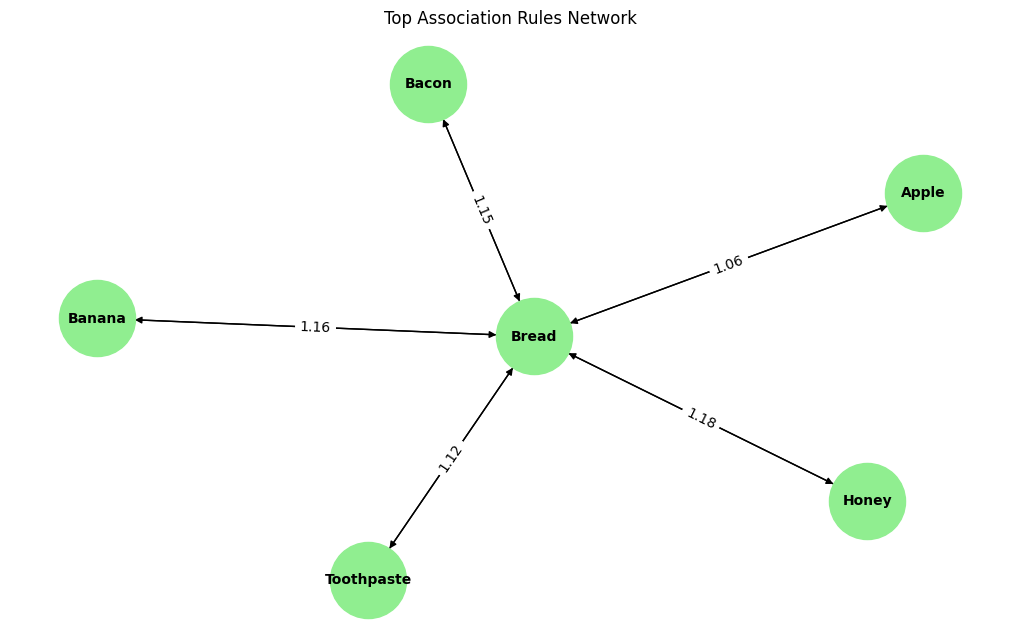

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

top_rules = rules.head(10)
G = nx.DiGraph()

for _, row in top_rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])

plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=3000, font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in labels.items()})
plt.title("Top Association Rules Network")
plt.show()

Final Thoughts! 

The association rule network shows that bread is a key item frequently purchased with other products. While some relationships are weak, several—such as bread with banana or honey—occur more often than expected by chance, indicating meaningful purchase patterns.


The association rule network shows that bread is a key item frequently purchased with other products. While some relationships are weak, several such as bread with banana or honey occur more often than expected by chance, indicating meaningful purchase patterns.